# Cleveland Heart Disease dataset (UCI Repository) — Machine Learning Project

### About Dataset:

Data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The “target” field refers to the presence of heart disease in the patient. It is integer valued 0 = disease and 1 = no disease.

### Context:




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

### Load Data:

In [3]:
df = pd.read_csv('data/heart_cleveland_upload.csv')
df.rename(columns={'condition':'target'}, inplace = True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


### Data Analysis:


In [31]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [32]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [33]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [34]:
df.shape

(297, 14)

The dataset does not contain any missing values or null values. The dataset contains 297 rows and 14 columns. The dataset contains 13 features and 1 target variable.

###  Analysis:

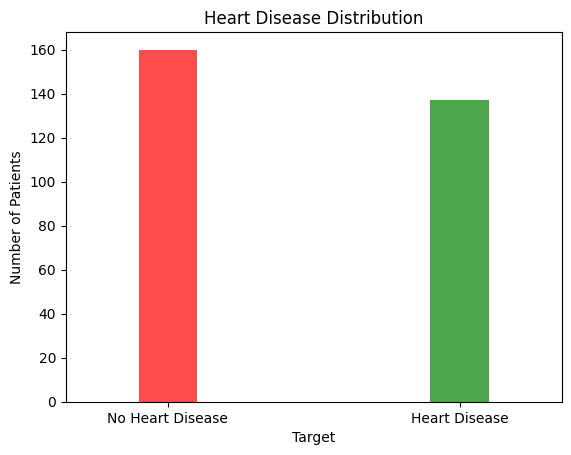

In [19]:
df['target'].value_counts().plot(kind='bar', color=['red', 'green'], width=0.2, alpha=0.7)
plt.title('Heart Disease Distribution')
plt.xlabel('Target')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'], rotation=0)
plt.show()

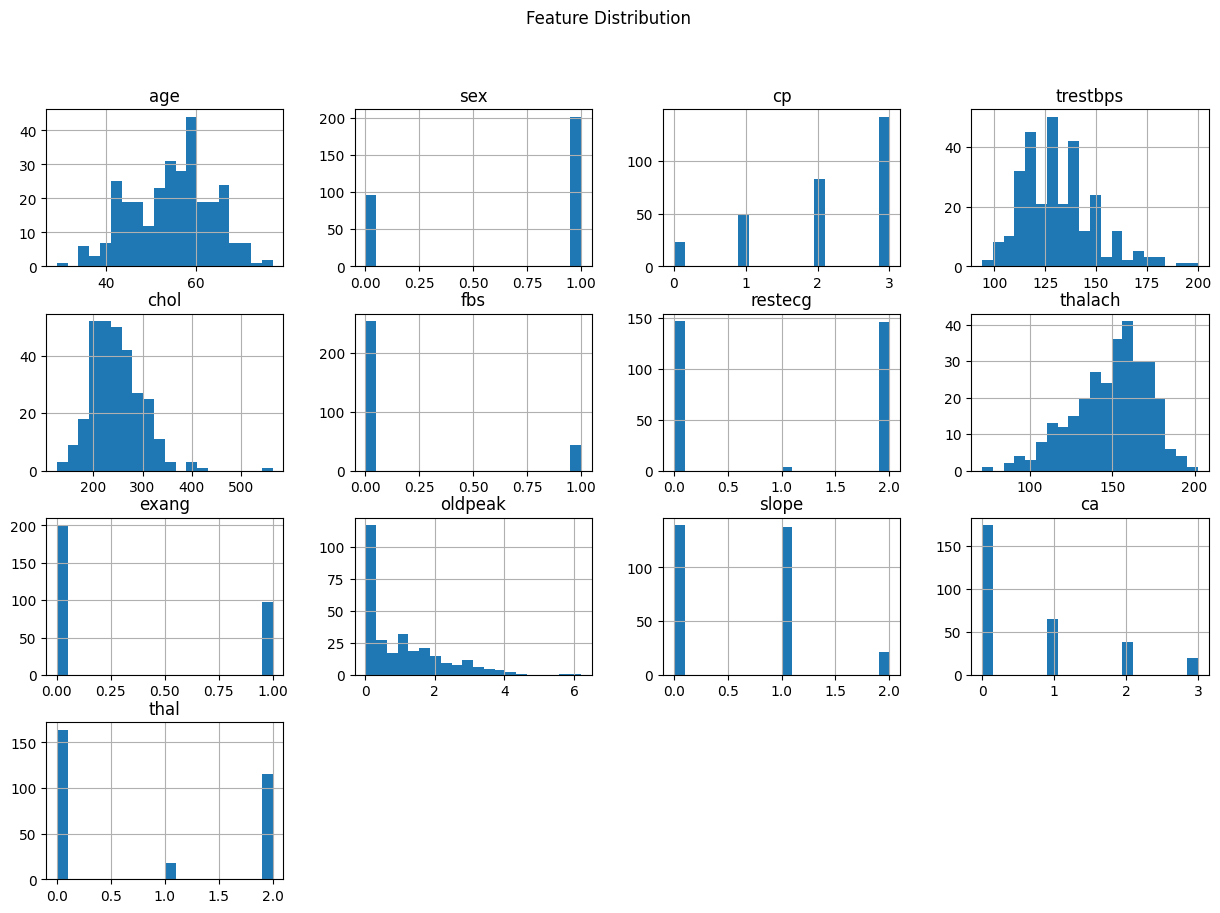

In [49]:
dfx = df.drop(columns=["target"])
dfx.hist(bins=20, figsize=(15, 10),)
plt.suptitle('Feature Distribution', ha='center', fontsize='large')
plt.show()



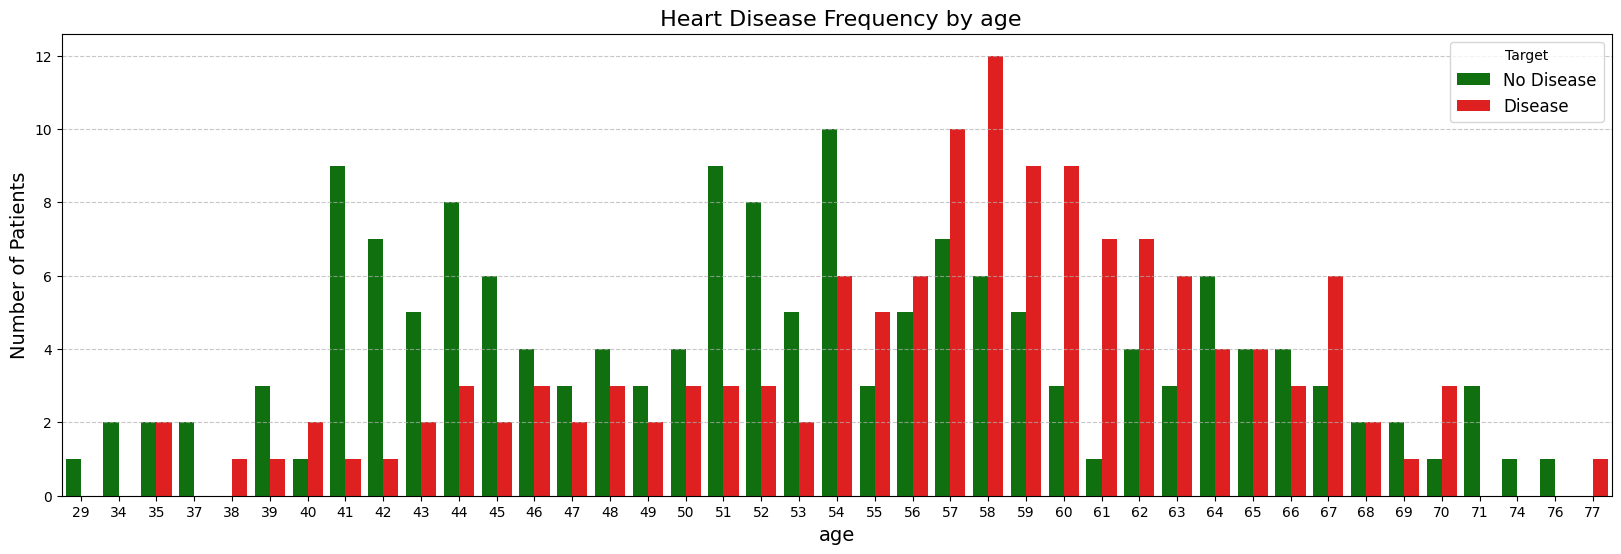

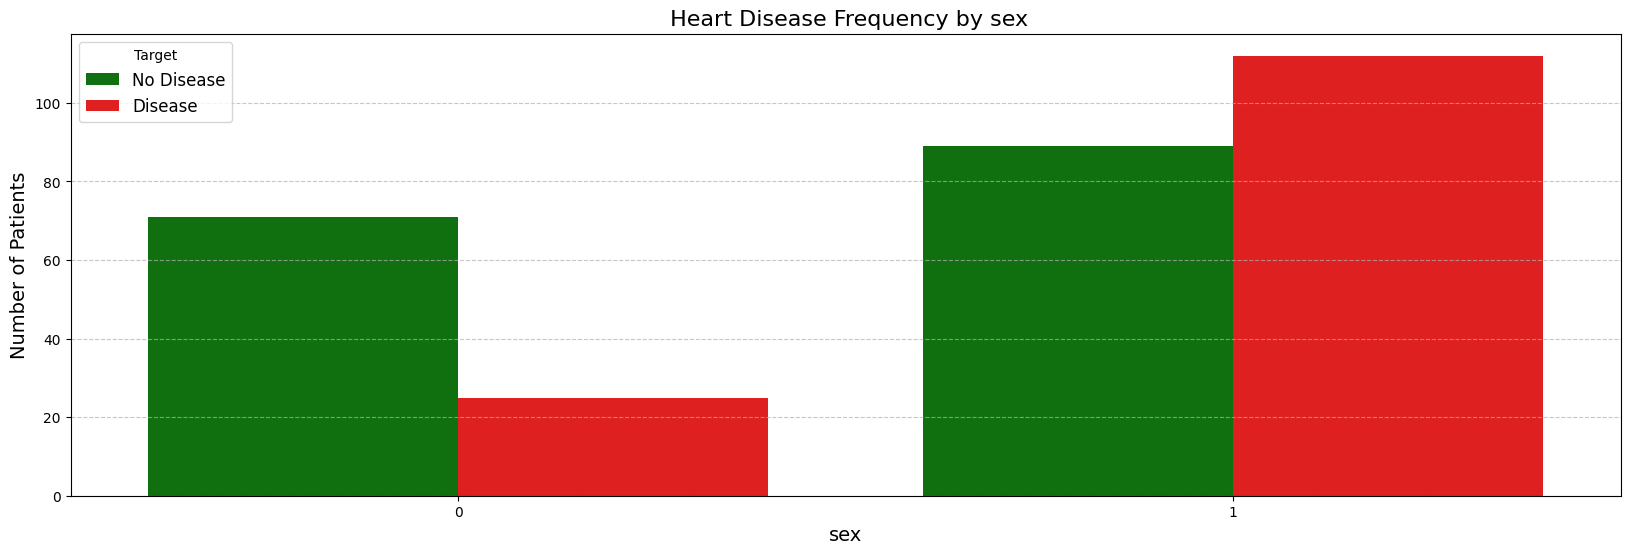

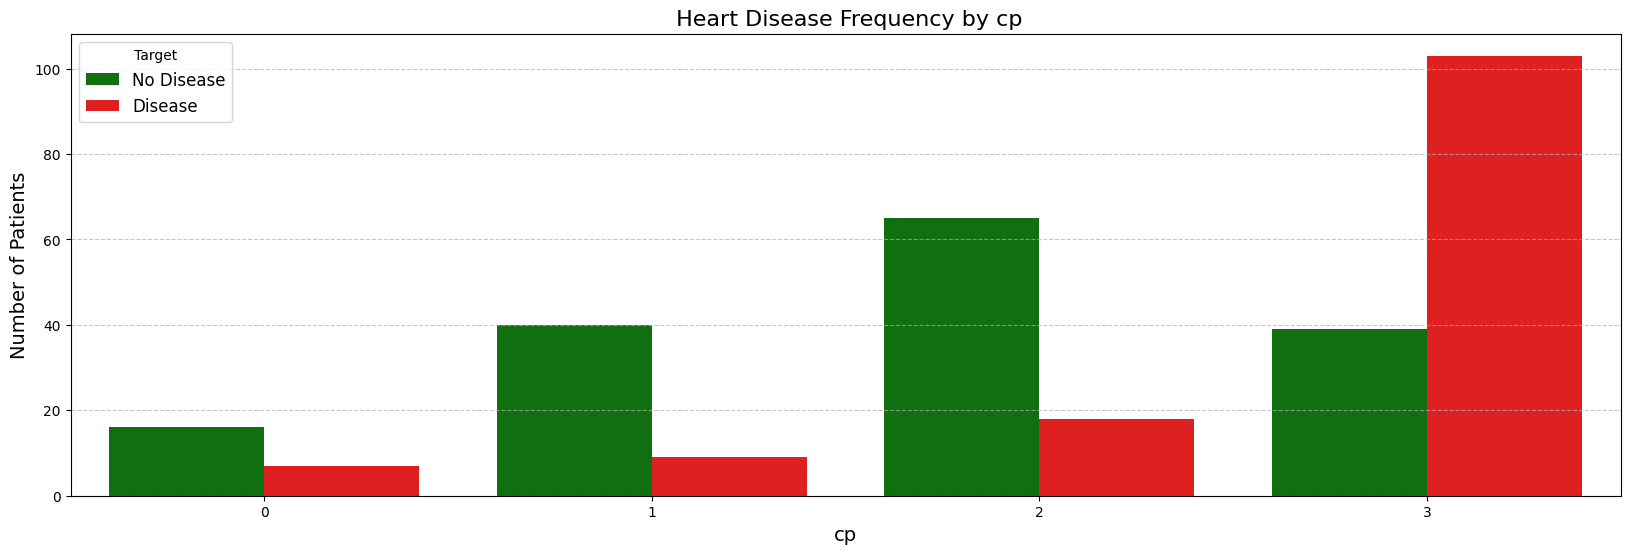

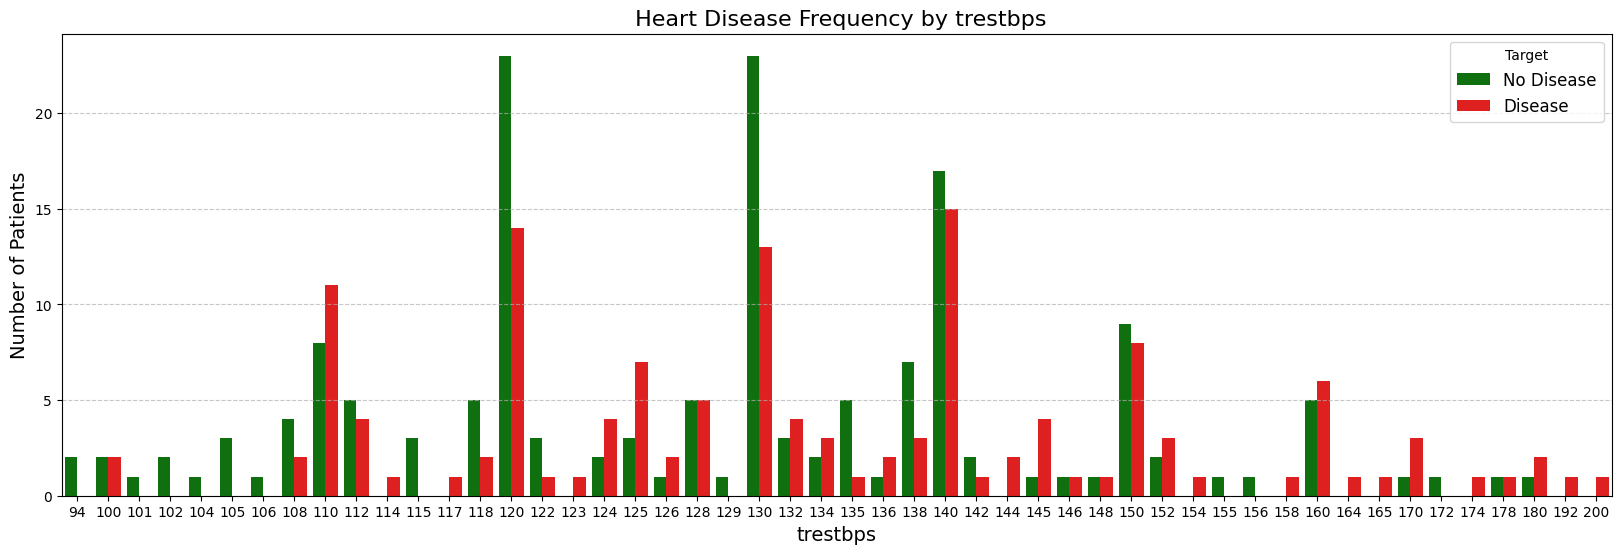

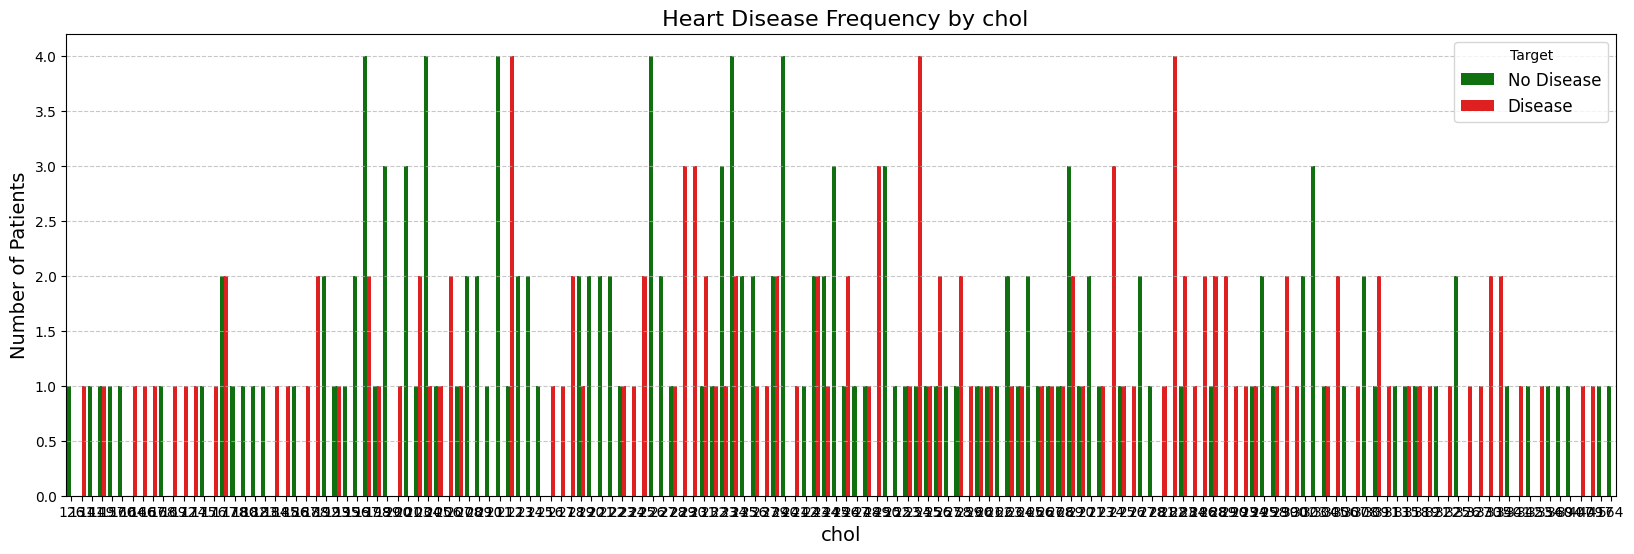

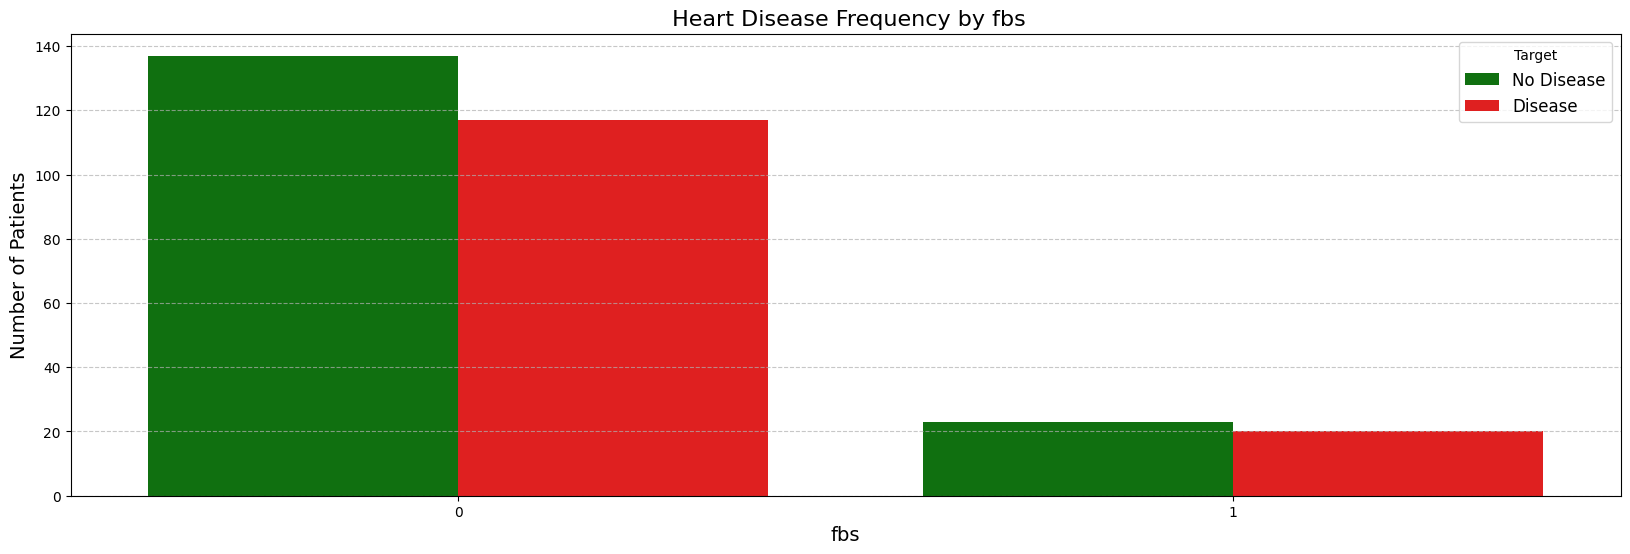

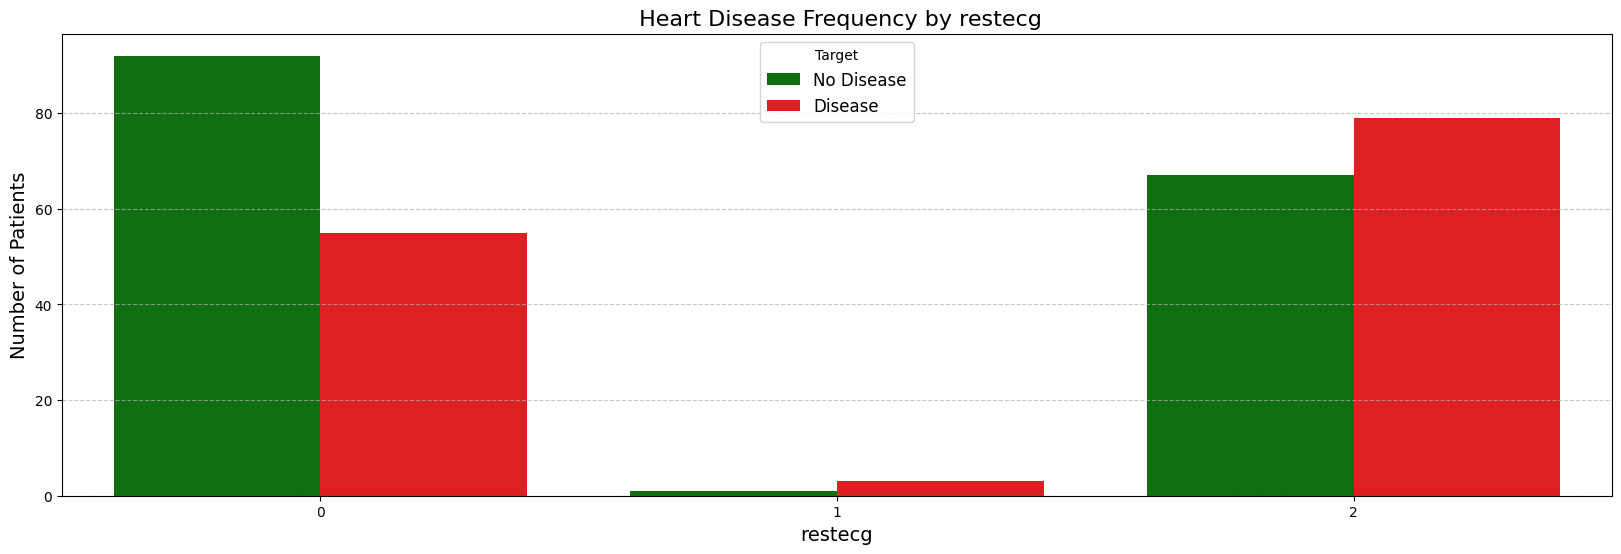

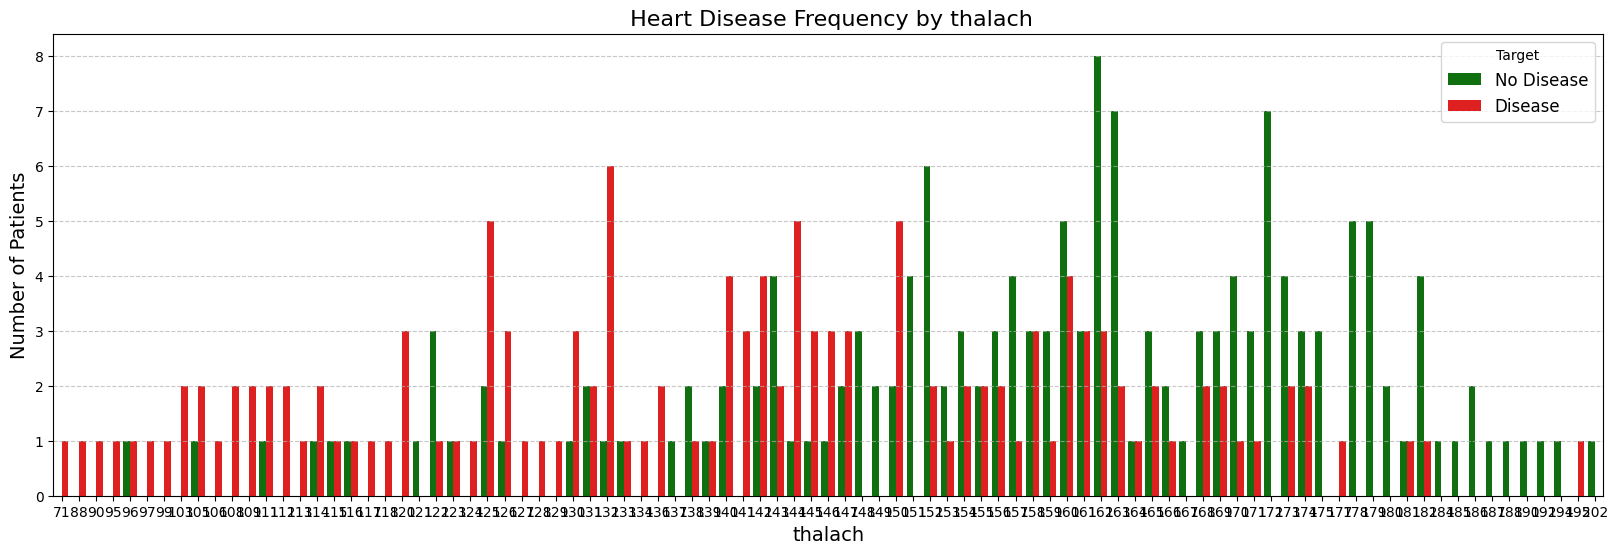

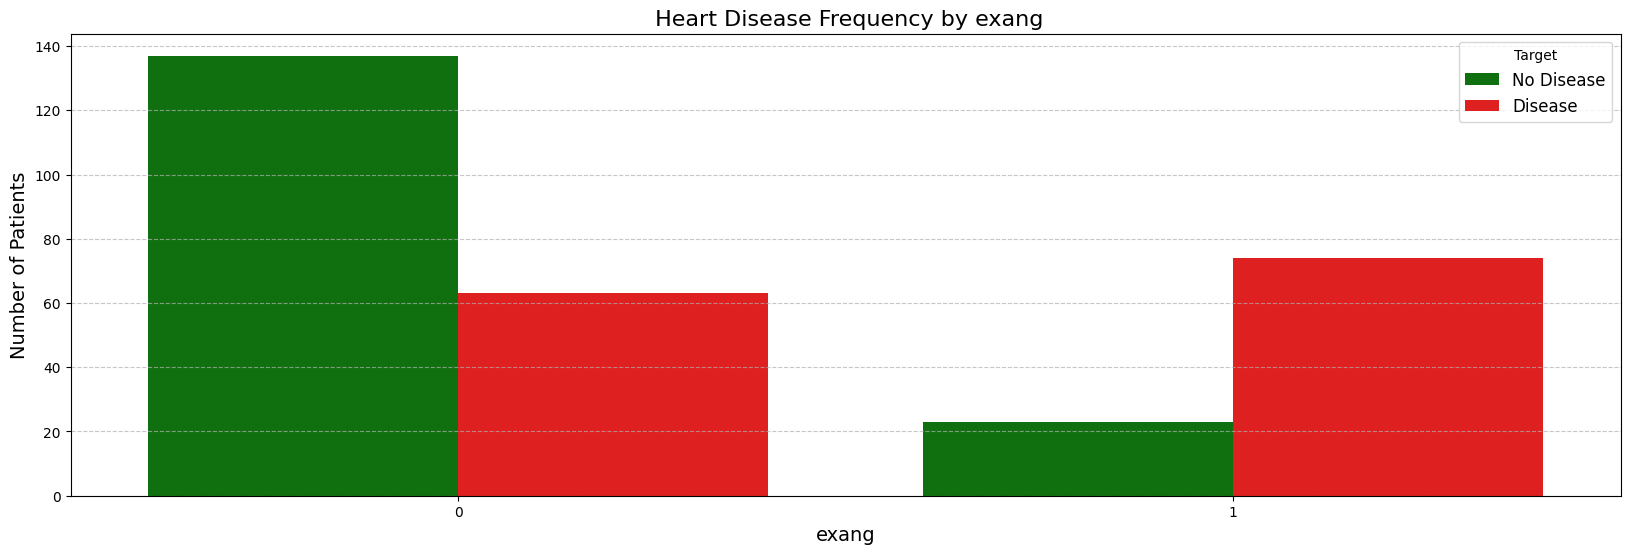

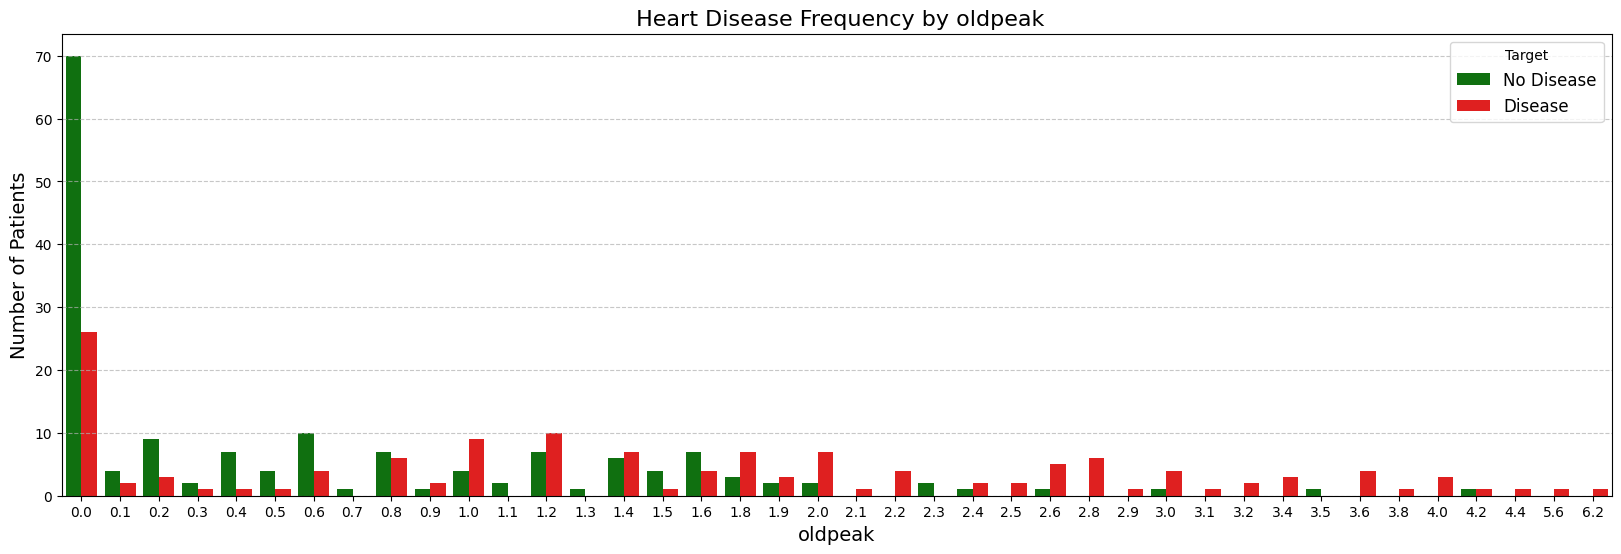

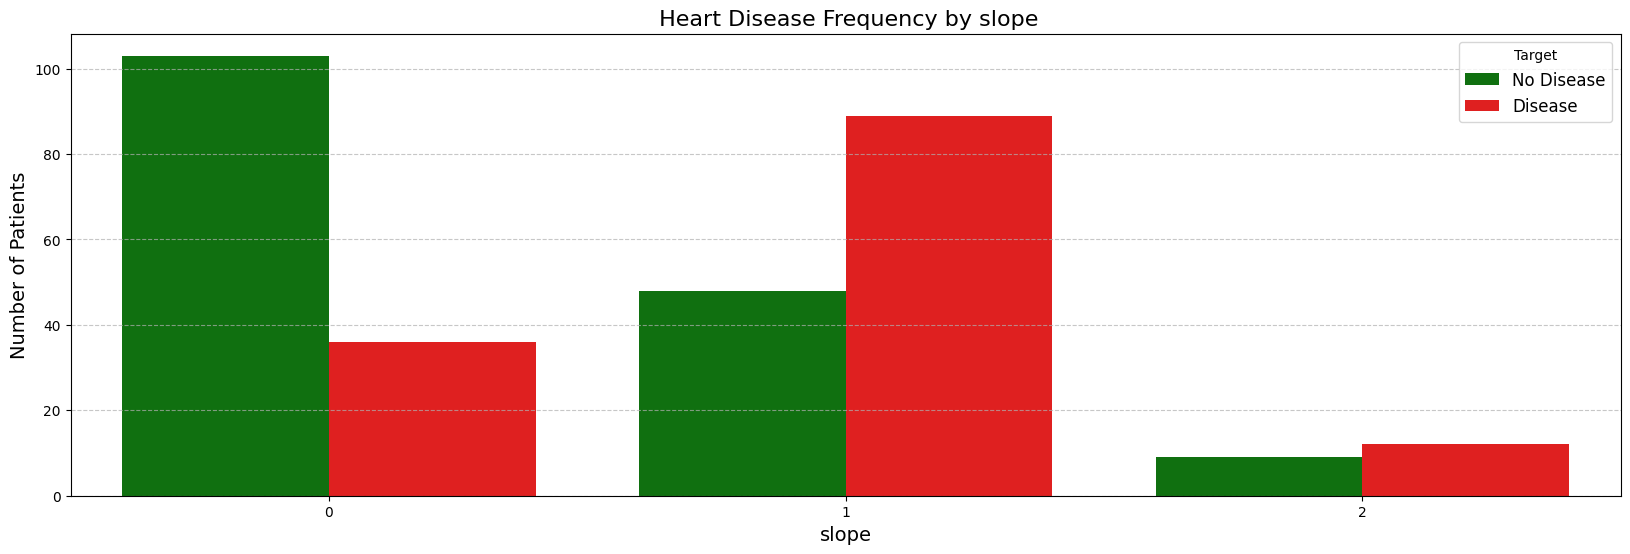

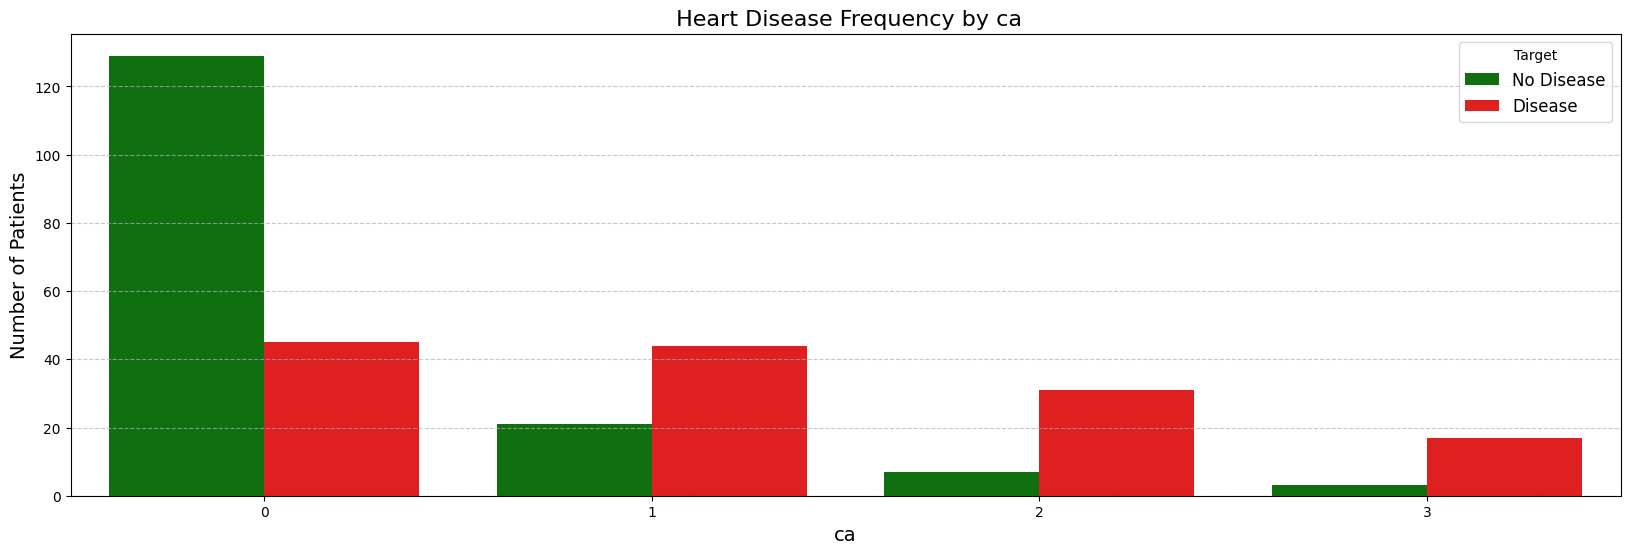

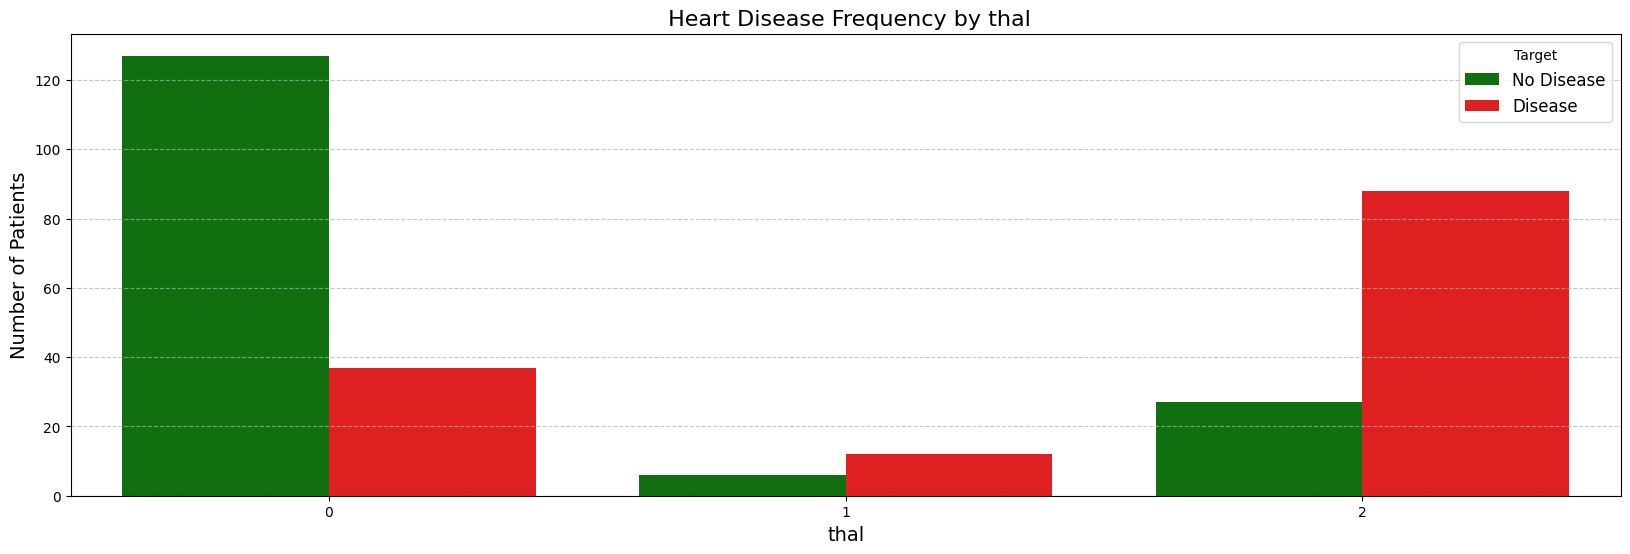

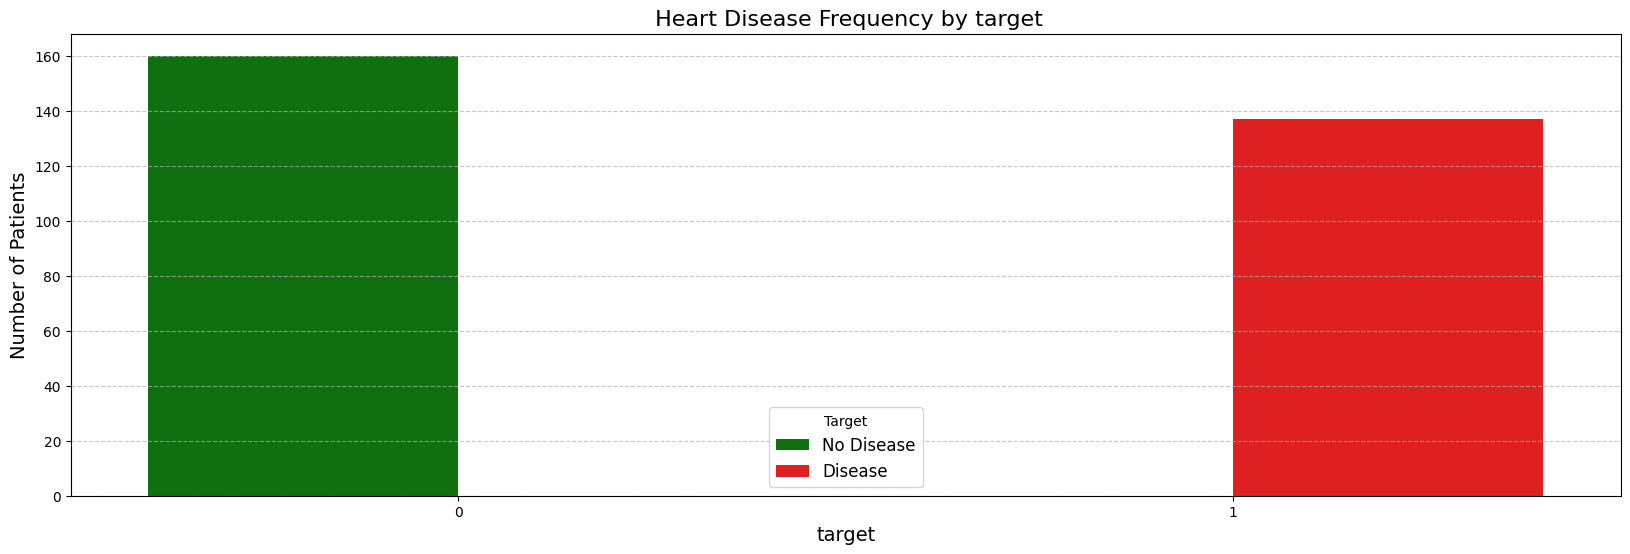

In [73]:

for column in df.columns:
    plt.figure(figsize=(20, 6)) 
    sns.countplot(data=df, x=column, hue='target', palette={0: 'green', 1: 'red'}, dodge=True)
    
    plt.title(f' Heart Disease Frequency by {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Number of Patients', fontsize=14)    
    plt.legend(title='Target', labels=['No Disease', 'Disease'], fontsize=12)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)  
    plt.show() 




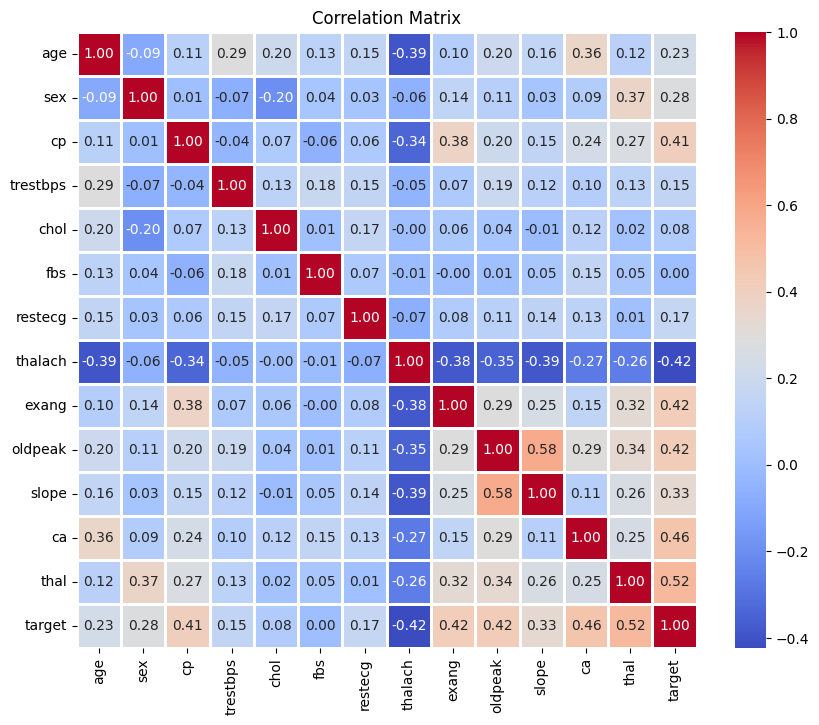

In [53]:
matrix_corr = df.corr()
# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Matrix')
plt.show()


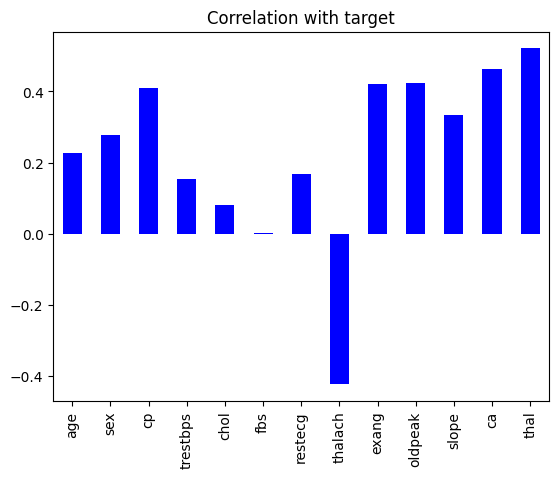

In [59]:
correlation = df.drop('target', axis=1).corrwith(df['target']).plot(kind='bar', color='blue', title='Correlation with target')
plt.show()  

### Model Building:

In [ ]:
X = df.drop(columns=['target'])
y = df['target']
# Vamos dividir o dataset em treino e teste, 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)